# Example Cosmology Calculations

This is a notebook to demonstrate usage of the `cosmology` python module (which was written specifically for this course as a teaching aid). In this example, we plot the scale factor as a function of cosmic time to visualize the cosmic expansion history. 

This exercise involves solving the following numeric integral:

$\int_0^a \frac{da^\prime}{[\Omega_{r,0}/{a^\prime}^2 + \Omega_{m,0}/a^\prime + \Omega_{\Lambda,0}{a^\prime}^2 + (1 - \Omega_0)]^{1/2}} = H_0 t$

It will be helpful to look at the source code of `cosmology.py` to understand what the `Cosmology` python class is doing under the hood.

In [1]:
# The first step in many python scripts is importing modules

import numpy as np # Use the "np" alias for short
import pylab

# This module contains the Cosmology class with several helper functions
import cosmology 

pylab.ion() # Turn on interactive plotting

Instantiate a `Cosmology` object and set some initial cosmological parameter values. Choose a benchmark set of cosmological parameter values representative of current measurements.

In [2]:
my_cosmology = cosmology.Cosmology()

In [3]:
# This is a python dictionary to hold parameter values
parameters = {'omega_matter_0': 0.31,
              'omega_radiation_0': 9.0e-5, # photons + neutrinos
              'omega_lambda_0': 1. - (0.31 + 9.0e-5),
              'hubble_0': 68.} # km s^-1 Mpc^-1

# We want a flat Universe in this case
parameters['omega_lambda_0'] = 1. - (parameters['omega_matter_0'] + parameters['omega_radiation_0'])

# Set the parameter values
# The "**" syntax tells python to read the dictionary as a set of keyword arguments to the function
my_cosmology.setParams(**parameters)

# Print out the parameter values of our Cosmology instance
my_cosmology.show()

{'omega_radiation_0': 9e-05, 'hubbleTime': 4.5382352941176474e+17, 'hubbleDistance': 1.3605629411764707e+26, 'omega_0': 1.0, 'omega_lambda_0': 0.68991, 'hubble_0': 68.0, 'omega_matter_0': 0.31}


In [4]:
my_cosmology.cosmicTime(1.)

0.9548953842493219

Let's calculate the age of the Universe. At the current time, the scale factor is $a=1$. We take advantage of some of the unit conversions already available in the `cosmology` module.

In [5]:
age_of_the_universe = my_cosmology.cosmicTime(1.) \
    * my_cosmology.hubbleTime / (1.e9 * cosmology.Constants.YR_TO_S)
print('The age of the Universe is %.1f Gyr'%(age_of_the_universe))

The age of the Universe is 13.7 Gyr


Now let's plot the evolution of the scale factor. This is where we need to evaluate the numeric integral mentioned above. The integral is already implemented in the `cosmicTime` function within the `Cosmology` class.

In [6]:
# Create a log-spaced set of scale factor values
a_array = np.logspace(-6, 3, 100)

# For each scale factor value, compute the associated cosmic time
t_array = np.empty(len(a_array))
for ii in range(0, len(a_array)):
    t_array[ii] = my_cosmology.cosmicTime(a_array[ii])

The following cell shows commonly used plotting syntax to set the axes labels and interval for display. A helper function is defined to display out the current cosmological time on the curve of the cosmic expansion history.

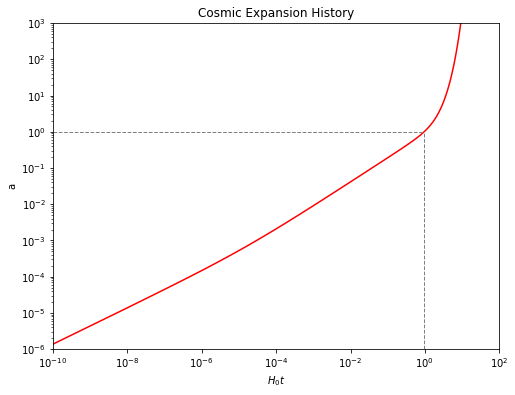

In [7]:
pylab.figure(figsize=(8, 6))
pylab.xscale('log')
pylab.yscale('log')
pylab.plot(t_array, a_array, c='red')
pylab.xlim(1.e-10, 1.e2)
pylab.ylim(1.e-6, 1.e3)
pylab.xlabel('$H_0 t$')
pylab.ylabel('a')
pylab.title('Cosmic Expansion History')

def reticule(x, y):
    """
    Helper plotting function to draw crosshairs at an important point
    """
    pylab.plot((x, x), (pylab.ylim()[0], y), c='0.5', ls='--', lw=1)
    pylab.plot((pylab.xlim()[0], x), (y, y), c='0.5', ls='--', lw=1)

# Show the current cosmological time
reticule(my_cosmology.cosmicTime(1.), 1.)

Apparently, we live in interesting times! The scale factor has started to grow exponentially with respect to cosmic time.